In [1]:
import pandas as pd
import numpy as np

Order of operations for working with new data-set:
1. Import data
2. Quick check data

In [2]:
% ls data-genomics/

genes.csv*                 source.txt
gtex_gene_expression.csv*  toxicogenomics_chemicals.csv*


In [3]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = 'data-genomics/'

genes = pd.read_csv(data_folder + 'genes.csv')
#organs = pd.read_csv(data_folder + 'Organ_gene_relation.csv')
#disease = pd.read_csv(data_folder + 'selected_gene_disease.csv')
express = pd.read_csv(data_folder + 'gtex_gene_expression.csv')
tox = pd.read_csv(data_folder + 'toxicogenomics_chemicals.csv')

height has been deprecated.



What need to happen:
1. Checklist for cleaning data
2. How to quickly screen for interesting things
3. Plan for working through data

In [5]:
genes.head(10)

,ensembl_id,entrez_id,hgnc_symbol,hgnc_name,cytogenetic_location,uni_protein_id,gene_biotype
0,seedRow,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000136155,8796.0,SCEL,sciellin,13q22.3,O95171,protein_coding
2,ENSG00000227942,83957.0,FRMD8P1,FERM domain containing 8 pseudogene 1,Xq12,NaN,processed_pseudogene
3,ENSG00000142002,91039.0,DPP9,dipeptidyl peptidase 9,19p13.3,Q86TI2,protein_coding
4,ENSG00000267077,NaN,NaN,NaN,NaN,NaN,NaN
5,ENSG00000231414,NaN,NaN,NaN,NaN,NaN,NaN
6,ENSG00000272311,NaN,NaN,NaN,NaN,NaN,NaN
7,ENSG00000237753,NaN,NaN,NaN,NaN,NaN,NaN
8,ENSG00000221672,NaN,NaN,NaN,NaN,NaN,NaN
9,ENSG00000253578,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
express.head(10)
list(np.sort(express['gene_type'].unique()))

['3prime_overlapping_ncrna',
 'IG_C_gene',
 'IG_C_pseudogene',
 'IG_D_gene',
 'IG_J_gene',
 'IG_J_pseudogene',
 'IG_V_gene',
 'IG_V_pseudogene',
 'Mt_rRNA',
 'Mt_tRNA',
 'TEC',
 'TR_C_gene',
 'TR_D_gene',
 'TR_J_gene',
 'TR_J_pseudogene',
 'TR_V_gene',
 'TR_V_pseudogene',
 'antisense',
 'bidirectional_promoter_lncrna',
 'lincRNA',
 'miRNA',
 'misc_RNA',
 'polymorphic_pseudogene',
 'processed_pseudogene',
 'processed_transcript',
 'protein_coding',
 'rRNA',
 'ribozyme',
 'scaRNA',
 'sense_intronic',
 'sense_overlapping',
 'snRNA',
 'snoRNA',
 'transcribed_processed_pseudogene',
 'transcribed_unitary_pseudogene',
 'transcribed_unprocessed_pseudogene',
 'translated_unprocessed_pseudogene',
 'unitary_pseudogene',
 'unprocessed_pseudogene',
 'vaultRNA']

In [7]:
# genes.shape
# express.shape
tox.shape

(55374, 6)

In [8]:
genes.columns
express.columns
# tox.columns
express.head(10)

,chromosome,chromosome_start,chromosome_end,gene_symbol,score,strand_type,gene_id,gene_type,rpkm_expressions
0,chr1,11868,13052,DDX11L1,15,+,ENSG00000223972,transcribed_unprocessed_pseudogene,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1,chr1,14969,29806,WASH7P,427,-,ENSG00000227232,unprocessed_pseudogene,"6.886,6.083,4.729,5.91,6.371,6.007,8.768,4.202..."
2,chr1,29553,31109,RP11-34P13.3,63,+,ENSG00000243485,lincRNA,"0,0,0,0,0,0,0,0.041,0.056,0.094,0.054,0.051,0...."
3,chr1,34553,36081,FAM138A,0,-,ENSG00000237613,lincRNA,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,chr1,52472,54936,OR4G4P,0,+,ENSG00000268020,unprocessed_pseudogene,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
5,chr1,62947,63887,OR4G11P,0,+,ENSG00000240361,unprocessed_pseudogene,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
6,chr1,69090,70008,OR4F5,0,+,ENSG00000186092,protein_coding,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
7,chr1,92090,133566,RP11-34P13.7,140,-,ENSG00000238009,lincRNA,"0.14,0.114,0.074,0.08,0.088,0.081,0.076,0.056,..."
8,chr1,131024,134836,CICP27,54,+,ENSG00000233750,processed_pseudogene,"0,0.013,0.005,0.002,0.003,0,0.01,0,0,0.004,0.0..."
9,chr1,135140,135895,RP11-34P13.15,390,-,ENSG00000268903,processed_pseudogene,"1.457,2.53,1.82,1.264,1.301,0.49,1.13,1.181,0...."


Notes:
* HUGO Gene Nomenclature Committee. HGNC is responsible for approving unique symbols and names for human loci, including protein coding genes, ncRNA genes and pseudogenes, to allow unambiguous scientific communication. (https://www.genenames.org/)

In [9]:
tox

,gene_id,chemical_name,chemical_id,gene_forms,interactions,interaction_actions
0,ENSG00000136997,10074-G5,C534883,protein,10074-G5 analog results in decreased expressio...,decreases^expression
1,ENSG00000136997,10074-G5,C534883,protein,10074-G5 results in decreased activity of MYC ...,decreases^activity
2,ENSG00000136997,10074-G5,C534883,protein,10074-G5 results in decreased expression of MY...,decreases^expression
3,ENSG00000124762,10-decarbamoylmitomycin C,C067795,mRNA,[10-decarbamoylmitomycin C results in increase...,increases^expression|increases^stability
4,ENSG00000101966,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",C554291,protein,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",affects^binding|decreases^reaction
5,ENSG00000101966,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",C554291,protein,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",affects^binding|decreases^reaction
6,ENSG00000101966,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",C554291,protein,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",affects^binding|increases^reaction
7,ENSG00000101966,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",C554291,protein,"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-...",decreases^expression
8,ENSG00000100985,10-nitro-oleic acid,C521487,mRNA,10-nitro-oleic acid inhibits the reaction [Tet...,decreases^reaction|increases^expression
9,ENSG00000100985,10-nitro-oleic acid,C521487,protein,10-nitro-oleic acid inhibits the reaction [Tet...,decreases^reaction|increases^secretion


In [5]:
import sklearn
from sklearn.decomposition import PCA

In [11]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [6]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components = 2)
pca.fit(X)
pca.components_

array([[-0.83849224, -0.54491354],
       [ 0.54491354, -0.83849224]])

In [12]:
pca.explained_variance_

array([ 6.61628593,  0.05038073])

In [8]:
X.shape

(6, 2)

<IPython.core.display.Javascript object>


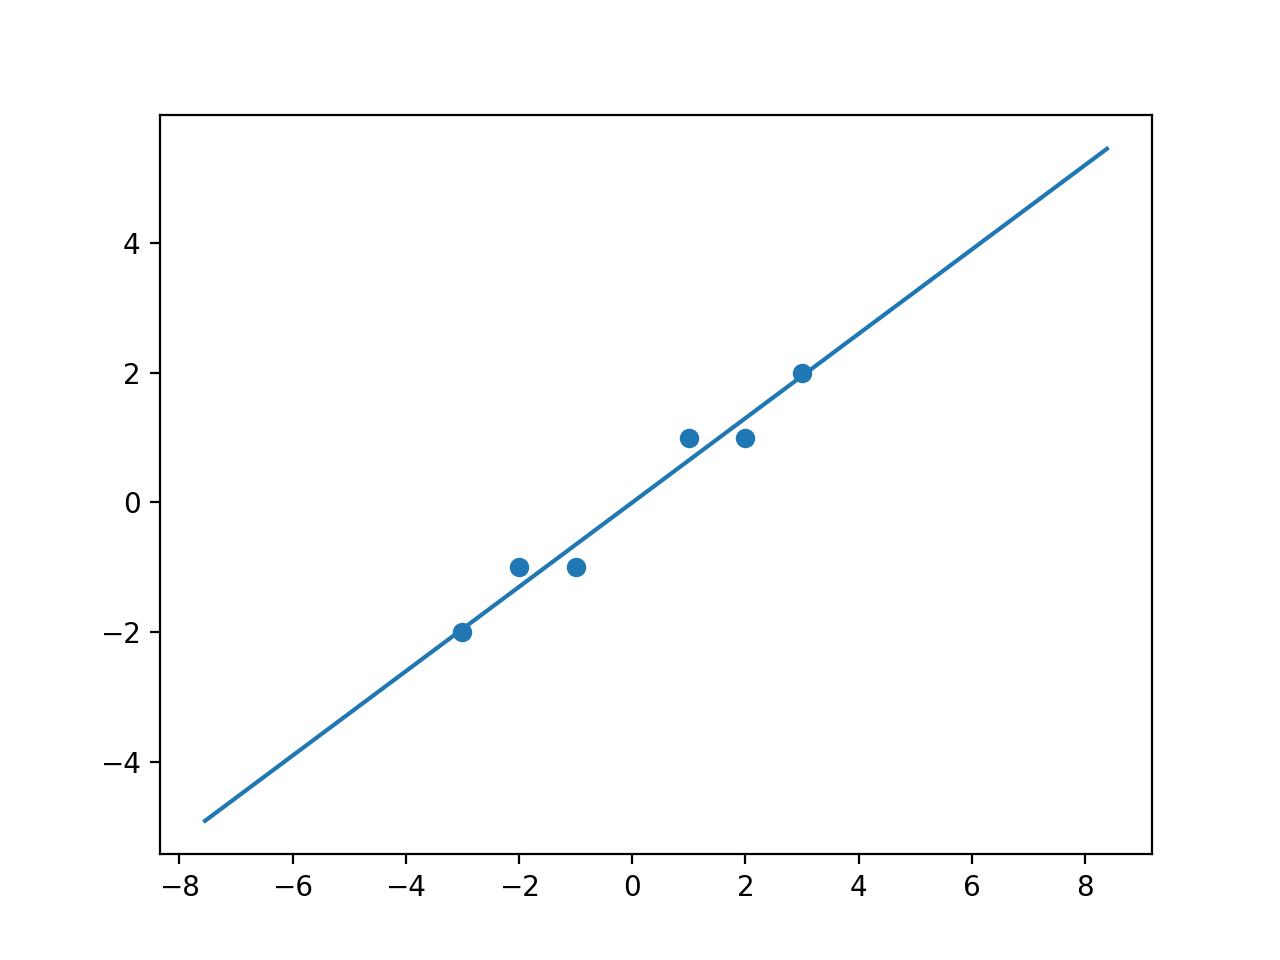

In [15]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.scatter(X[:, 0], X[:, 1])
plt.plot(np.arange(-10, 10)*pca.components_[0, 0], np.arange(-10, 10)*pca.components_[0, 1])